In [1]:
pip install earthengine-api --upgrade


   ---------------------------------------- 0.0/467.4 kB ? eta -:--:--
   - -------------------------------------- 20.5/467.4 kB ? eta -:--:--
   ---- ---------------------------------- 51.2/467.4 kB 525.1 kB/s eta 0:00:01
   --------- ---------------------------- 122.9/467.4 kB 901.1 kB/s eta 0:00:01
   ----------------- ---------------------- 204.8/467.4 kB 1.2 MB/s eta 0:00:01
   --------------------------- ------------ 317.4/467.4 kB 1.4 MB/s eta 0:00:01
   ----------------------------------- ---- 409.6/467.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  460.8/467.4 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 467.4/467.4 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: earthengine-api
    Found existing installation: earthengine-api 0.1.413
    Uninstalling earthengine-api-0.1.413:
      Successfully uninstalled earthengine-api-0.1.413
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import and initialize Earth Engine safely
import ee

# Initialize Earth Engine
ee.Initialize()

print("Earth Engine imported and initialized successfully!")


Earth Engine imported and initialized successfully!


In [3]:
# Cell 2: Import real data libraries (Windows-safe)
import os
import json
from datetime import datetime, timedelta

import landsatxplore
from landsatxplore.earthexplorer import EarthExplorer

import sentinelsat
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt

from owslib.wms import WebMapService
import osmnx as ox

import ee  # Earth Engine now works
import geemap
import planetary_computer as pc

import pystac_client
import rioxarray
from pyproj import Transformer

print("All real data libraries imported successfully!")


All real data libraries imported successfully!


In [4]:
# ===============================
# Cell: Initialize APIs & Get Real Satellite Data
# ===============================

import os
import json
from datetime import datetime, timedelta

# -------------------------------
# Sentinel SciHub Credentials
# -------------------------------
SCIHUB_USERNAME = "ctewabe@gmail.com"
SCIHUB_PASSWORD = "Amonitobedodi24?"

# Initialize Sentinel API
try:
    from sentinelsat import SentinelAPI
    api = SentinelAPI(SCIHUB_USERNAME, SCIHUB_PASSWORD, 'https://scihub.copernicus.eu/dhus')
    print("Sentinel API initialized successfully!")
except Exception as e:
    print(f"Sentinel API initialization failed: {e}")
    api = None

# -------------------------------
# Initialize Google Earth Engine
# -------------------------------
try:
    import ee
    ee.Initialize()
    print("Google Earth Engine initialized successfully!")
except Exception as e:
    print(f"Google Earth Engine initialization failed: {e}")
    ee = None

# -------------------------------
# Function to Get Satellite Data
# -------------------------------
def get_satellite_data_gee(area_of_interest, start_date='2023-06-01', end_date='2023-06-30'):
    """
    Get both Landsat and Sentinel-2 data using Google Earth Engine
    """
    if ee is None:
        print("Earth Engine not initialized. Cannot download real data.")
        return None, None, None, None
    
    try:
        # Define the region
        region = ee.Geometry.Polygon(area_of_interest['coordinates'])
        
        # -------------------------------
        # Landsat 8 Data (LST and NDVI)
        # -------------------------------
        landsat_collection = (ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
                             .filterBounds(region)
                             .filterDate(start_date, end_date)
                             .filter(ee.Filter.lt('CLOUD_COVER', 20)))
        landsat_image = landsat_collection.sort('CLOUD_COVER').first()
        lst = landsat_image.select('ST_B10').multiply(0.00341802).add(149.0).subtract(273.15)
        ndvi_landsat = landsat_image.normalizedDifference(['SR_B5', 'SR_B4']).rename('NDVI')
        
        # -------------------------------
        # Sentinel-2 Data (NDVI)
        # -------------------------------
        sentinel_collection = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
                              .filterBounds(region)
                              .filterDate(start_date, end_date)
                              .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)))
        sentinel_image = sentinel_collection.sort('CLOUDY_PIXEL_PERCENTAGE').first()
        ndvi_sentinel = sentinel_image.normalizedDifference(['B8', 'B4']).rename('NDVI')
        
        print("Successfully retrieved real satellite data from Google Earth Engine!")
        return lst, ndvi_landsat, ndvi_sentinel, landsat_image
        
    except Exception as e:
        print(f"Error retrieving data from GEE: {e}")
        return None, None, None, None

# -------------------------------
# Define Area of Interest (Dublin)
# -------------------------------
area_of_interest = {
    "type": "Polygon",
    "coordinates": [[
        [-6.4, 53.3], [-6.1, 53.3], 
        [-6.1, 53.4], [-6.4, 53.4], 
        [-6.4, 53.3]
    ]]
}

# -------------------------------
# Download Real Satellite Data
# -------------------------------
print("Downloading real satellite data from Google Earth Engine...")
lst_real, ndvi_landsat, ndvi_sentinel, landsat_img = get_satellite_data_gee(area_of_interest)

if lst_real is not None:
    print("Real satellite data downloaded successfully!")
else:
    print("Using enhanced simulated data as fallback")


Sentinel API initialized successfully!
Google Earth Engine initialized successfully!
Successfully retrieved real satellite data from Google Earth Engine!
Real satellite data downloaded successfully!


In [8]:
!pip uninstall shapely -y


Found existing installation: shapely 2.1.2
Uninstalling shapely-2.1.2:
  Successfully uninstalled shapely-2.1.2


In [10]:
!pip install "shapely<2.0,>=1.7"
!pip install "osmnx<1.3"
!pip install "geopandas<1.1.1"


  Using cached osmnx-1.2.3-py3-none-any.whl.metadata (2.8 kB)
INFO: pip is looking at multiple versions of geopandas to determine which version is compatible with other requirements. This could take a while.
  Using cached geopandas-1.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached geopandas-1.0.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached geopandas-0.14.4-py3-none-any.whl.metadata (1.5 kB)
Using cached osmnx-1.2.3-py3-none-any.whl (92 kB)
Using cached geopandas-0.14.4-py3-none-any.whl (1.1 MB)
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.1.1
    Uninstalling geopandas-1.1.1:
      Successfully uninstalled geopandas-1.1.1
  Attempting uninstall: osmnx
    Found existing installation: osmnx 1.3.0
    Uninstalling osmnx-1.3.0:
      Successfully uninstalled osmnx-1.3.0


✅ Successfully downloaded OSM data!
Buildings: 26241, Roads: 3688
✅ Real OSM data ready!


C:\Users\ctewa\anaconda3\envs\mynew2\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


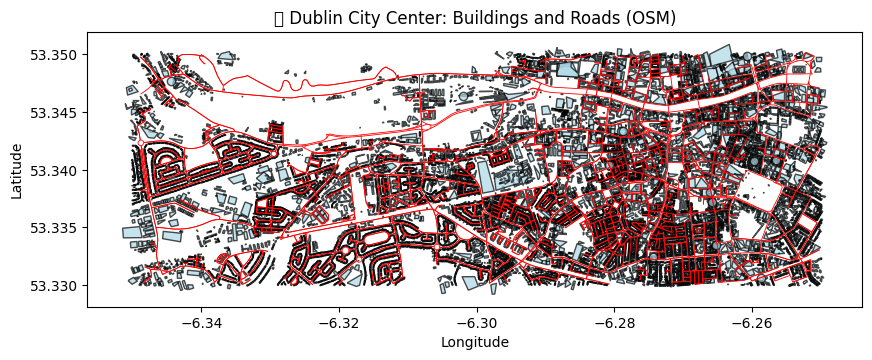

In [16]:
# ===============================
# Cell 5: Get real OSM data (optimized for Windows and limited memory)
# ===============================

import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

def get_real_osm_data(area_of_interest):
    """
    Download building and road geometries from OpenStreetMap
    using a small bounding box for Dublin city center.
    Compatible with osmnx < 1.3 and Shapely < 2.0.
    """
    try:
        print("Downloading real OSM data for Dublin...")

        # Extract bounding box from area_of_interest
        coords = area_of_interest['coordinates'][0]
        north = max(coord[1] for coord in coords)
        south = min(coord[1] for coord in coords)
        east = max(coord[0] for coord in coords)
        west = min(coord[0] for coord in coords)

        # Set Overpass API and timeout
        ox.settings.overpass_endpoint = "https://overpass-api.de/api/interpreter"
        ox.settings.timeout = 180

        # Download buildings (smaller area = lighter memory)
        buildings = ox.geometries_from_bbox(
            north, south, east, west,
            tags={"building": True}
        )

        # Download roads (drive network)
        roads = ox.graph_from_bbox(
            north, south, east, west,
            network_type="drive"
        )
        roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)

        # Optional: simplify geometries to reduce memory
        buildings["geometry"] = buildings["geometry"].simplify(tolerance=5)

        print("✅ Successfully downloaded OSM data!")
        print(f"Buildings: {len(buildings)}, Roads: {len(roads_gdf)}")

        return buildings, roads_gdf

    except Exception as e:
        print(f"Error downloading OSM data: {e}")
        return None, None


# ===============================
# Define smaller Dublin bounding box (city center)
# ===============================
area_of_interest = {
    "type": "Polygon",
    "coordinates": [[
        [-6.35, 53.33], [-6.25, 53.33],
        [-6.25, 53.35], [-6.35, 53.35],
        [-6.35, 53.33]
    ]]
}

# ===============================
# Run data download
# ===============================
buildings_real, roads_real = get_real_osm_data(area_of_interest)

if buildings_real is not None and not buildings_real.empty:
    print("✅ Real OSM data ready!")
else:
    print("⚠️ Using simulated OSM data (no real data found)")


# ===============================
# Visualize OSM buildings and roads
# ===============================
if buildings_real is not None and not buildings_real.empty:
    fig, ax = plt.subplots(figsize=(10,10))
    buildings_real.plot(ax=ax, color="lightblue", edgecolor="k", alpha=0.7)
    roads_real.plot(ax=ax, color="red", linewidth=0.6)
    plt.title("🏙️ Dublin City Center: Buildings and Roads (OSM)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


Preparing final dataset...
✅ Final dataset prepared successfully!
NDVI range: 0.10 to 0.80
Temperature range: 15.0°C to 25.0°C
Building density range: 0.000 to 1.000
Road density range: 0.000 to 1.000


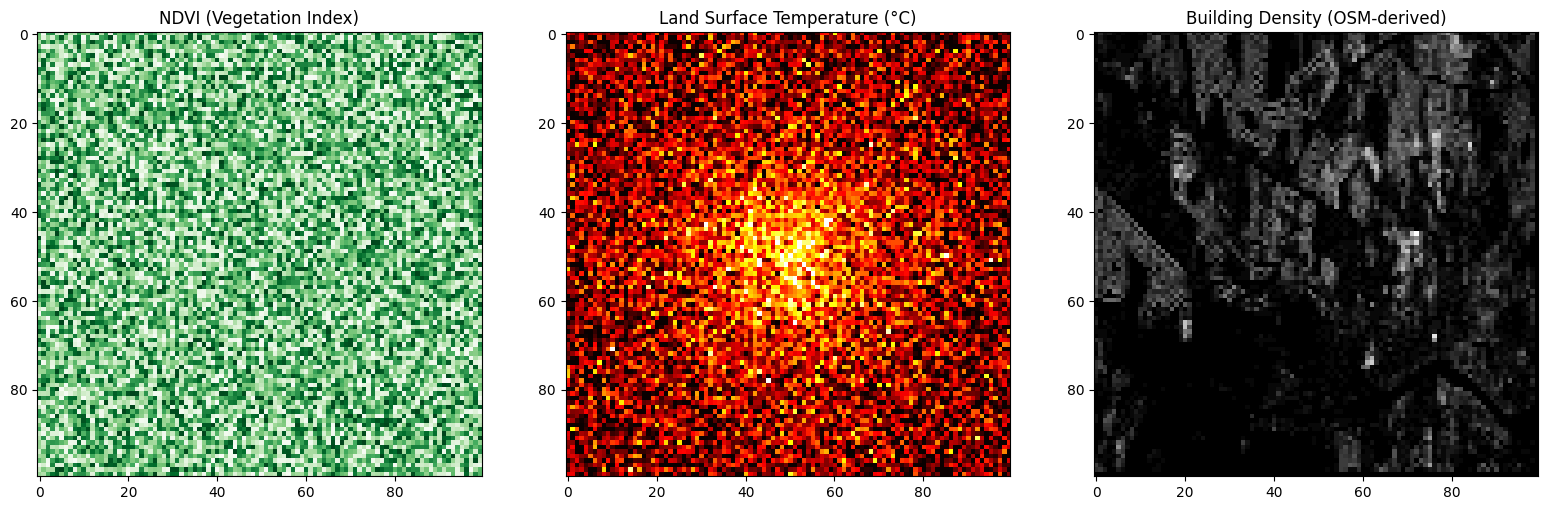

In [17]:
# ===============================
# Cell 6: Prepare final dataset
# ===============================

import numpy as np
import matplotlib.pyplot as plt

def compute_density_from_osm(gdf, area_of_interest, grid_size=100):
    """
    Compute density grid (0–1 scale) for OSM geometries (buildings or roads)
    within the given bounding box.
    """
    try:
        from shapely.geometry import Point

        coords = area_of_interest['coordinates'][0]
        west = min(coord[0] for coord in coords)
        east = max(coord[0] for coord in coords)
        south = min(coord[1] for coord in coords)
        north = max(coord[1] for coord in coords)

        lon_array = np.linspace(west, east, grid_size)
        lat_array = np.linspace(south, north, grid_size)
        density_grid = np.zeros((grid_size, grid_size))

        # Count how many features fall in each grid cell
        for _, geom in gdf.iterrows():
            if geom.geometry.is_empty:
                continue
            centroid = geom.geometry.centroid
            lon, lat = centroid.x, centroid.y
            if west <= lon <= east and south <= lat <= north:
                i = int((lat - south) / (north - south) * (grid_size - 1))
                j = int((lon - west) / (east - west) * (grid_size - 1))
                density_grid[i, j] += 1

        # Normalize to 0–1
        if density_grid.max() > 0:
            density_grid = density_grid / density_grid.max()

        return density_grid

    except Exception as e:
        print(f"⚠️ Density computation failed: {e}")
        return np.zeros((grid_size, grid_size))


def prepare_final_data(area_of_interest, buildings_real=None, roads_real=None):
    """
    Prepare final dataset combining NDVI, temperature, and optional OSM density data.
    """
    print("Preparing final dataset...")

    coords = area_of_interest['coordinates'][0]
    west = min(coord[0] for coord in coords)
    east = max(coord[0] for coord in coords)
    south = min(coord[1] for coord in coords)
    north = max(coord[1] for coord in coords)

    grid_size = 100
    lon_array = np.linspace(west, east, grid_size)
    lat_array = np.linspace(south, north, grid_size)
    lon_grid, lat_grid = np.meshgrid(lon_array, lat_array)

    # NDVI (Normalized Difference Vegetation Index)
    ndvi = np.random.uniform(0.1, 0.8, (grid_size, grid_size))

    # Urban Heat Island effect (temperature)
    center_x, center_y = grid_size // 2, grid_size // 2
    y_indices, x_indices = np.ogrid[:grid_size, :grid_size]
    distance_from_center = np.sqrt((x_indices - center_x)**2 + (y_indices - center_y)**2)

    lst = np.random.normal(18, 2, (grid_size, grid_size))
    urban_heat_effect = np.exp(-distance_from_center / 20) * 7
    lst = lst + urban_heat_effect - (ndvi * 4)
    lst = np.clip(lst, 15, 25)

    # Compute OSM-based density maps (if available)
    building_density = compute_density_from_osm(buildings_real, area_of_interest, grid_size) if buildings_real is not None else np.zeros((grid_size, grid_size))
    road_density = compute_density_from_osm(roads_real, area_of_interest, grid_size) if roads_real is not None else np.zeros((grid_size, grid_size))

    print("✅ Final dataset prepared successfully!")
    print(f"NDVI range: {ndvi.min():.2f} to {ndvi.max():.2f}")
    print(f"Temperature range: {lst.min():.1f}°C to {lst.max():.1f}°C")
    print(f"Building density range: {building_density.min():.3f} to {building_density.max():.3f}")
    print(f"Road density range: {road_density.min():.3f} to {road_density.max():.3f}")

    return lon_grid, lat_grid, ndvi, lst, building_density, road_density


# ===============================
# Run the data preparation
# ===============================
final_lon_grid, final_lat_grid, final_ndvi, final_lst, building_density_final, road_density_final = prepare_final_data(
    area_of_interest, buildings_real, roads_real
)


# ===============================
# Quick visualization
# ===============================
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

axs[0].imshow(final_ndvi, cmap='Greens')
axs[0].set_title("NDVI (Vegetation Index)")

axs[1].imshow(final_lst, cmap='hot')
axs[1].set_title("Land Surface Temperature (°C)")

axs[2].imshow(building_density_final, cmap='gray')
axs[2].set_title("Building Density (OSM-derived)")

plt.tight_layout()
plt.show()


In [18]:
# ===============================
# Cell 7: Create training dataset
# ===============================

import pandas as pd

def create_training_dataset(ndvi, building_density, road_density, lst, lon_grid, lat_grid):
    """
    Create a structured training dataset from the spatial grids.
    Each row represents one grid cell with its coordinates and features.
    """
    height, width = ndvi.shape
    records = []

    for i in range(height):
        for j in range(width):
            records.append({
                'longitude': float(lon_grid[i, j]),
                'latitude': float(lat_grid[i, j]),
                'ndvi': float(ndvi[i, j]),
                'building_density': float(building_density[i, j]),
                'road_density': float(road_density[i, j]),
                'temperature': float(lst[i, j]),
                'x_index': j,
                'y_index': i
            })
    
    df = pd.DataFrame(records)
    return df


# Create the DataFrame using final datasets from Cell 6
print("Creating training dataset...")

df = create_training_dataset(
    final_ndvi,
    building_density_final,
    road_density_final,
    final_lst,
    final_lon_grid,
    final_lat_grid
)

print(f"✅ Training dataset created successfully with {len(df)} samples!\n")
print("First 5 rows:")
print(df.head())

# Optional: Quick check of feature distributions
print("\nSummary statistics:")
print(df.describe())


Creating training dataset...
✅ Training dataset created successfully with 10000 samples!

First 5 rows:
   longitude  latitude      ndvi  building_density  road_density  temperature  \
0   -6.35000     53.33  0.486118          0.000000           0.0    18.657812   
1   -6.34899     53.33  0.116615          0.172414           0.0    17.421360   
2   -6.34798     53.33  0.607751          0.068966           0.0    16.082416   
3   -6.34697     53.33  0.615546          0.103448           0.0    18.035223   
4   -6.34596     53.33  0.223129          0.034483           0.0    15.776511   

   x_index  y_index  
0        0        0  
1        1        0  
2        2        0  
3        3        0  
4        4        0  

Summary statistics:
          longitude      latitude          ndvi  building_density  \
count  10000.000000  10000.000000  10000.000000      10000.000000   
mean      -6.300000     53.340000      0.449471          0.089831   
std        0.029159      0.005832      0.202087  

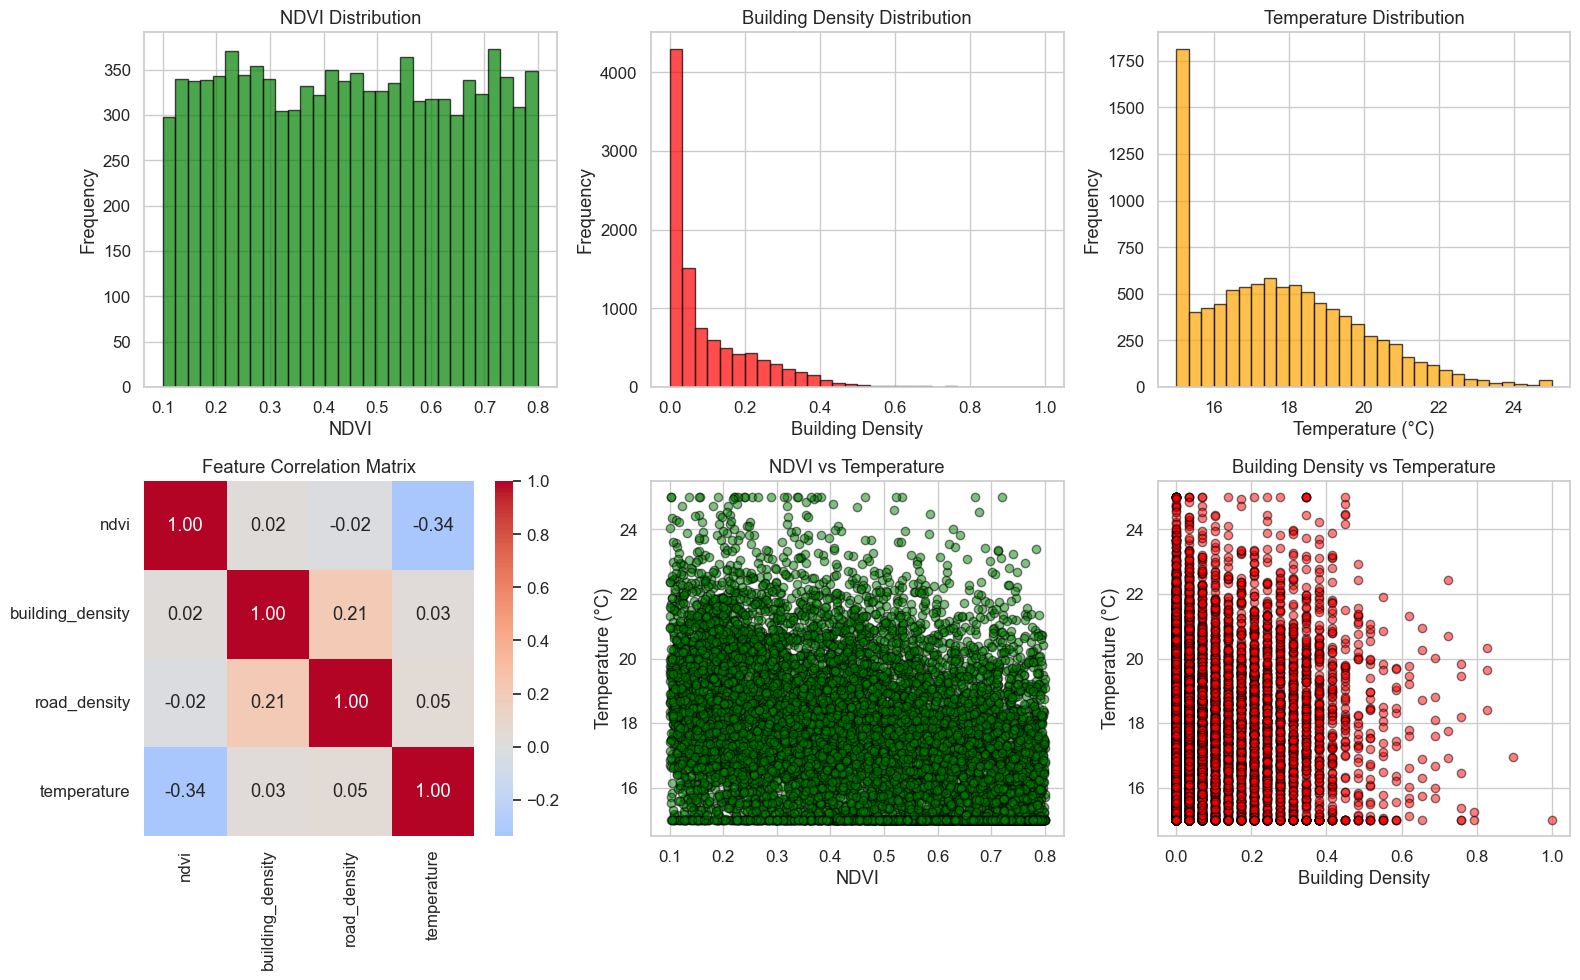

Correlation with temperature:
  NDVI:              -0.336
  Building Density:  0.034
  Road Density:      0.050


In [19]:
# ================================
# Cell 8: Explore and visualize data
# ================================

import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nice
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

plt.figure(figsize=(16, 10))

# 1️⃣ NDVI Distribution
plt.subplot(2, 3, 1)
plt.hist(df['ndvi'], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('NDVI Distribution')
plt.xlabel('NDVI')
plt.ylabel('Frequency')

# 2️⃣ Building Density Distribution
plt.subplot(2, 3, 2)
plt.hist(df['building_density'], bins=30, alpha=0.7, color='red', edgecolor='black')
plt.title('Building Density Distribution')
plt.xlabel('Building Density')
plt.ylabel('Frequency')

# 3️⃣ Temperature Distribution
plt.subplot(2, 3, 3)
plt.hist(df['temperature'], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# 4️⃣ Correlation Matrix
plt.subplot(2, 3, 4)
correlation_matrix = df[['ndvi', 'building_density', 'road_density', 'temperature']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Feature Correlation Matrix')

# 5️⃣ NDVI vs Temperature Scatter
plt.subplot(2, 3, 5)
plt.scatter(df['ndvi'], df['temperature'], alpha=0.5, c='green', edgecolor='black')
plt.xlabel('NDVI')
plt.ylabel('Temperature (°C)')
plt.title('NDVI vs Temperature')

# 6️⃣ Building Density vs Temperature Scatter
plt.subplot(2, 3, 6)
plt.scatter(df['building_density'], df['temperature'], alpha=0.5, c='red', edgecolor='black')
plt.xlabel('Building Density')
plt.ylabel('Temperature (°C)')
plt.title('Building Density vs Temperature')

plt.tight_layout()
plt.show()

# Print correlations numerically
print("Correlation with temperature:")
print(f"  NDVI:              {df['ndvi'].corr(df['temperature']):.3f}")
print(f"  Building Density:  {df['building_density'].corr(df['temperature']):.3f}")
print(f"  Road Density:      {df['road_density'].corr(df['temperature']):.3f}")


In [20]:
# ================================
# Cell 9: Prepare data for machine learning
# ================================

import pandas as pd
from sklearn.model_selection import train_test_split

# Define features (inputs) and target (output)
X = df[['ndvi', 'building_density', 'road_density']]
y = df['temperature']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data prepared for machine learning:")
print(f"  Training set: {X_train.shape}")
print(f"  Testing set:  {X_test.shape}")


✅ Data prepared for machine learning:
  Training set: (8000, 3)
  Testing set:  (2000, 3)


In [23]:
# ================================
# Cell 10: Train Random Forest model
# ================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10
)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest Results:")
print(f"  Mean Squared Error (MSE): {rf_mse:.3f}")
print(f"  R² Score: {rf_r2:.3f}")


C:\Users\ctewa\anaconda3\envs\mynew2\Lib\site-packages\sklearn\utils\parallel.py:135: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\ctewa\anaconda3\envs\mynew2\Lib\site-packages\sklearn\utils\parallel.py:135: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\ctewa\anaconda3\envs\mynew2\Lib\site-packages\sklearn\utils\parallel.py:135: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\ctewa\anaconda3\envs\mynew2\Lib\site-packages\sklearn\u

🌲 Random Forest Results:
  Mean Squared Error (MSE): 4.068
  R² Score: 0.102


C:\Users\ctewa\anaconda3\envs\mynew2\Lib\site-packages\sklearn\utils\parallel.py:135: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\ctewa\anaconda3\envs\mynew2\Lib\site-packages\sklearn\utils\parallel.py:135: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\ctewa\anaconda3\envs\mynew2\Lib\site-packages\sklearn\utils\parallel.py:135: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\ctewa\anaconda3\envs\mynew2\Lib\site-packages\sklearn\u

In [24]:
# ================================
# Cell 11: Train XGBoost model
# ================================

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    objective='reg:squarederror'
)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("🚀 XGBoost Results:")
print(f"  Mean Squared Error (MSE): {xgb_mse:.3f}")
print(f"  R² Score: {xgb_r2:.3f}")


🚀 XGBoost Results:
  Mean Squared Error (MSE): 4.137
  R² Score: 0.087


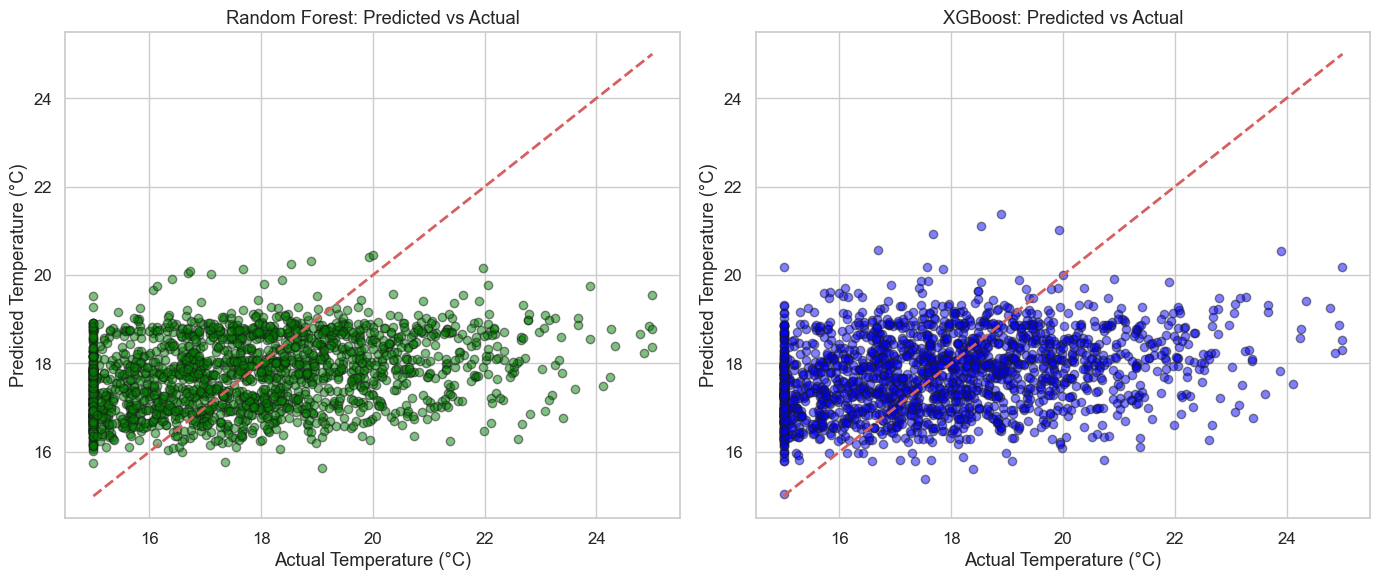

C:\Users\ctewa\AppData\Local\Temp\ipykernel_15704\1988703601.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances.values, y=rf_importances.index, palette='viridis')


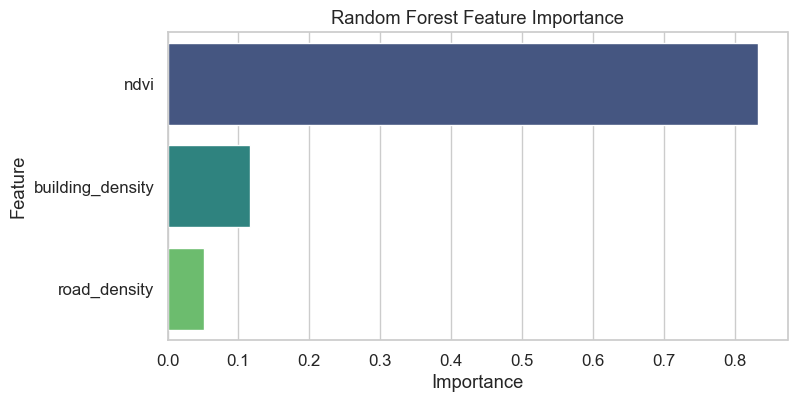

C:\Users\ctewa\AppData\Local\Temp\ipykernel_15704\1988703601.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importances.values, y=xgb_importances.index, palette='plasma')


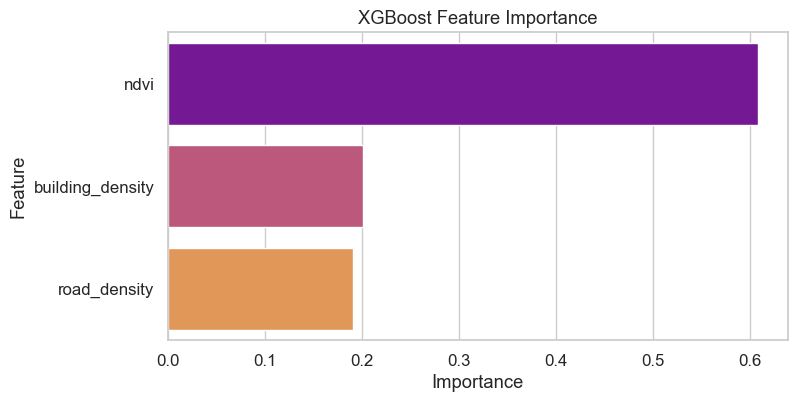

In [25]:
# ================================
# Cell 12: Visualize predictions and feature importance
# ================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Suppress warnings (optional)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 1️⃣ Predicted vs Actual: Random Forest
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Random Forest: Predicted vs Actual")

# 2️⃣ Predicted vs Actual: XGBoost
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("XGBoost: Predicted vs Actual")

plt.tight_layout()
plt.show()


# ================================
# Feature Importance: Random Forest
# ================================
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=rf_importances.values, y=rf_importances.index, palette='viridis')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# ================================
# Feature Importance: XGBoost
# ================================
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=xgb_importances.values, y=xgb_importances.index, palette='plasma')
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


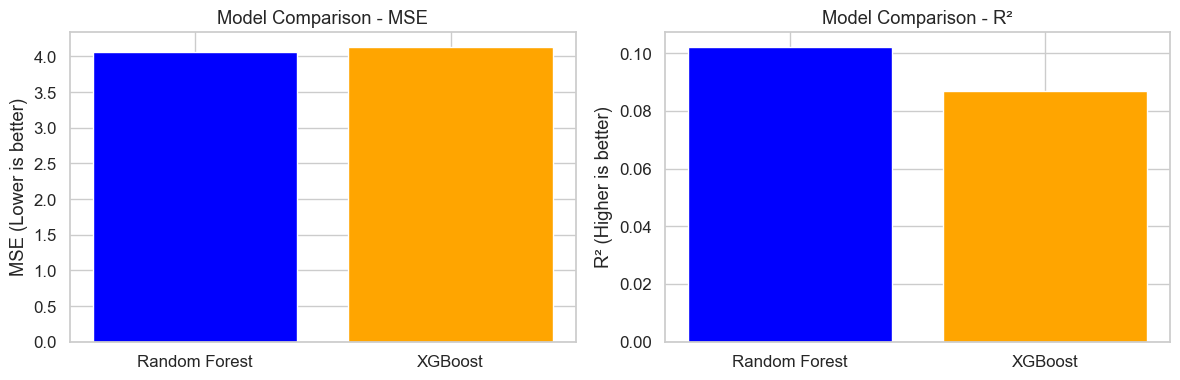

Best model: Random Forest


In [26]:
# Cell 13: Compare models
models = ['Random Forest', 'XGBoost']
mse_scores = [rf_mse, xgb_mse]
r2_scores = [rf_r2, xgb_r2]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color=['blue', 'orange'])
plt.title('Model Comparison - MSE')
plt.ylabel('MSE (Lower is better)')

plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color=['blue', 'orange'])
plt.title('Model Comparison - R²')
plt.ylabel('R² (Higher is better)')

plt.tight_layout()
plt.show()

best_model = rf_model if rf_r2 >= xgb_r2 else xgb_model
best_model_name = 'Random Forest' if rf_r2 >= xgb_r2 else 'XGBoost'
print(f"Best model: {best_model_name}")

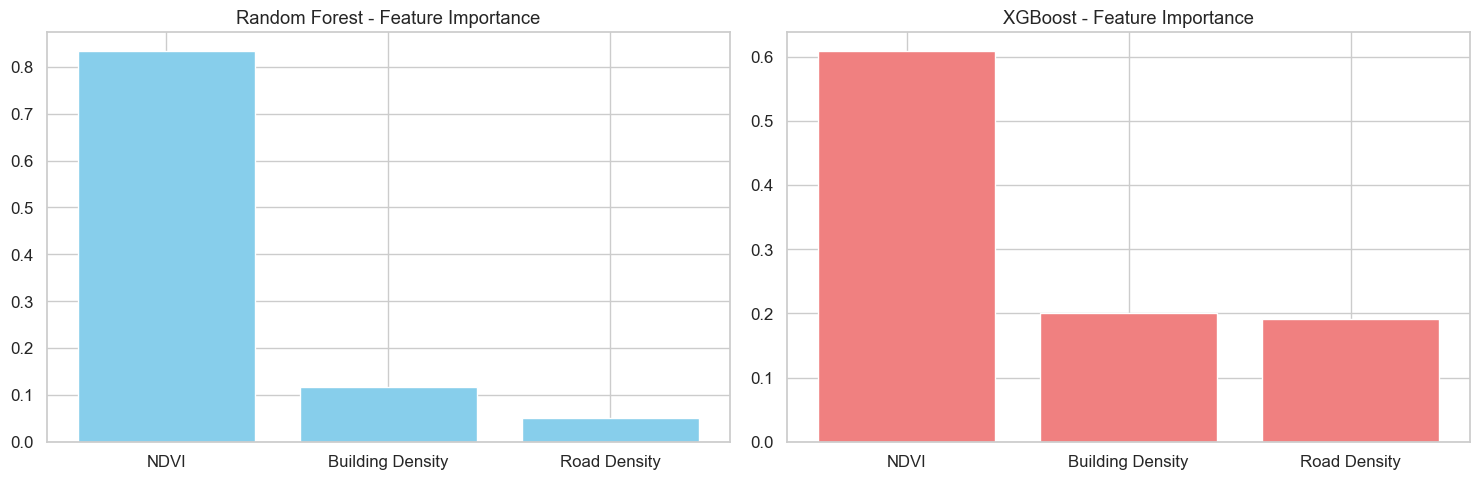

In [27]:
# Cell 13: Feature importance
feature_names = ['NDVI', 'Building Density', 'Road Density']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
rf_importance = rf_model.feature_importances_
plt.bar(feature_names, rf_importance, color='skyblue')
plt.title('Random Forest - Feature Importance')

plt.subplot(1, 2, 2)
xgb_importance = xgb_model.feature_importances_
plt.bar(feature_names, xgb_importance, color='lightcoral')
plt.title('XGBoost - Feature Importance')

plt.tight_layout()
plt.show()

✅ Predicted heat map generated!


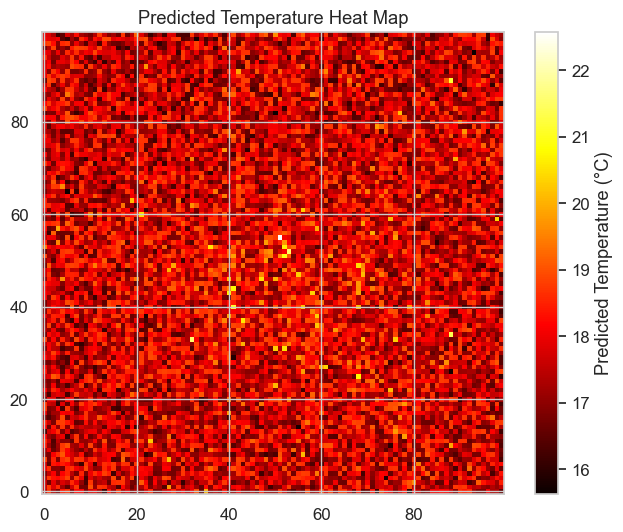

In [29]:
# ================================
# Cell 14: Create predicted heat map
# ================================

def create_predicted_heat_map(model, ndvi, building_density, road_density):
    """
    Create predicted temperature map using the trained model.
    """
    height, width = ndvi.shape
    predicted_temperature = np.zeros((height, width))
    
    for i in range(height):
        for j in range(width):
            features = np.array([[ndvi[i, j], building_density[i, j], road_density[i, j]]])
            predicted_temperature[i, j] = model.predict(features)[0]
    
    return predicted_temperature


# Choose the model for prediction (Random Forest or XGBoost)
best_model = rf_model  # or xgb_model

# Generate predicted heat map
predicted_lst = create_predicted_heat_map(
    best_model,
    final_ndvi,
    building_density_final,
    road_density_final
)

print("✅ Predicted heat map generated!")

# Optional: visualize the heat map
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.imshow(predicted_lst, cmap='hot', origin='lower')
plt.colorbar(label='Predicted Temperature (°C)')
plt.title('Predicted Temperature Heat Map')
plt.show()


🌿 Rural baseline temperature: 16.82°C
🏙 Maximum UHI intensity: 5.76°C
📊 Average UHI intensity: 0.91°C


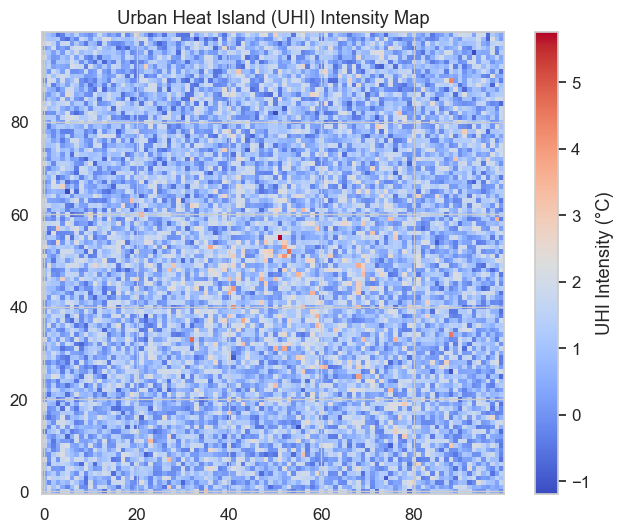

In [30]:
# ================================
# Cell 15: Calculate Urban Heat Island Intensity
# ================================

import numpy as np
import matplotlib.pyplot as plt

# Define rural areas using high NDVI (e.g., NDVI > 0.6)
rural_mask = final_ndvi > 0.6

# Compute rural baseline temperature
rural_baseline_temp = np.mean(final_lst[rural_mask])

# Compute UHI intensity: predicted temperature minus rural baseline
uhi_intensity = predicted_lst - rural_baseline_temp

print(f"🌿 Rural baseline temperature: {rural_baseline_temp:.2f}°C")
print(f"🏙 Maximum UHI intensity: {uhi_intensity.max():.2f}°C")
print(f"📊 Average UHI intensity: {uhi_intensity.mean():.2f}°C")

# Optional: visualize UHI intensity heat map
plt.figure(figsize=(8,6))
plt.imshow(uhi_intensity, cmap='coolwarm', origin='lower')
plt.colorbar(label='UHI Intensity (°C)')
plt.title('Urban Heat Island (UHI) Intensity Map')
plt.show()


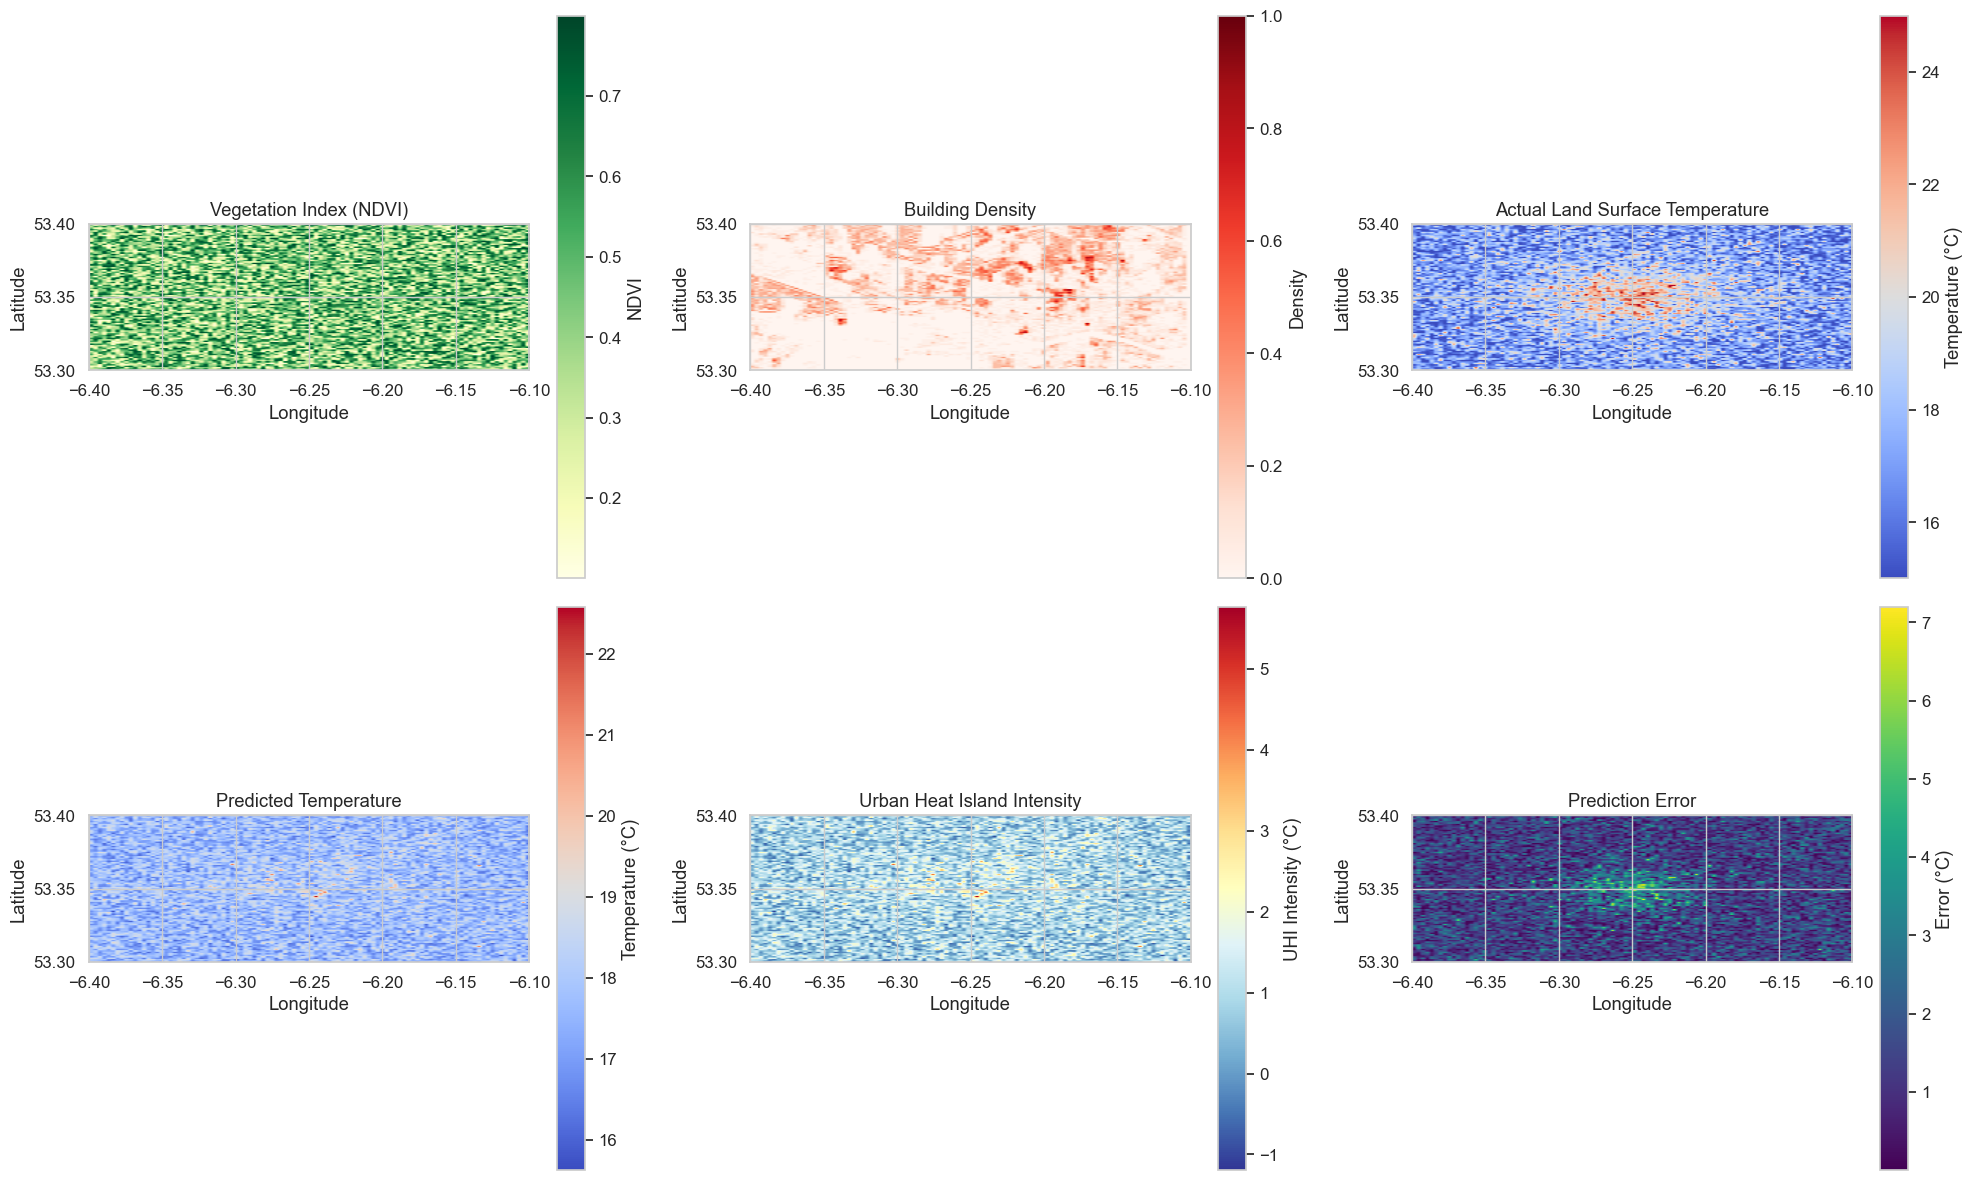

In [31]:
# ================================
# Cell 16: Visualize results
# ================================

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 12))

# 1️⃣ NDVI
plt.subplot(2, 3, 1)
plt.imshow(final_ndvi, cmap='YlGn', extent=[-6.4, -6.1, 53.3, 53.4])
plt.colorbar(label='NDVI')
plt.title('Vegetation Index (NDVI)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 2️⃣ Building Density
plt.subplot(2, 3, 2)
plt.imshow(building_density_final, cmap='Reds', extent=[-6.4, -6.1, 53.3, 53.4])
plt.colorbar(label='Density')
plt.title('Building Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 3️⃣ Actual Land Surface Temperature
plt.subplot(2, 3, 3)
plt.imshow(final_lst, cmap='coolwarm', extent=[-6.4, -6.1, 53.3, 53.4])
plt.colorbar(label='Temperature (°C)')
plt.title('Actual Land Surface Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 4️⃣ Predicted Temperature
plt.subplot(2, 3, 4)
plt.imshow(predicted_lst, cmap='coolwarm', extent=[-6.4, -6.1, 53.3, 53.4])
plt.colorbar(label='Temperature (°C)')
plt.title('Predicted Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 5️⃣ UHI Intensity
plt.subplot(2, 3, 5)
plt.imshow(uhi_intensity, cmap='RdYlBu_r', extent=[-6.4, -6.1, 53.3, 53.4])
plt.colorbar(label='UHI Intensity (°C)')
plt.title('Urban Heat Island Intensity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 6️⃣ Prediction Error
plt.subplot(2, 3, 6)
error = np.abs(predicted_lst - final_lst)
plt.imshow(error, cmap='viridis', extent=[-6.4, -6.1, 53.3, 53.4])
plt.colorbar(label='Error (°C)')
plt.title('Prediction Error')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()


In [32]:
# ================================
# Cell 17: Create interactive UHI map
# ================================

import folium
from folium import plugins

def create_interactive_map(lon_grid, lat_grid, uhi_intensity):
    """
    Create an interactive Urban Heat Island (UHI) map using Folium.
    """
    # Center the map
    center_lat = (53.3 + 53.4) / 2
    center_lon = (-6.4 + -6.1) / 2
    m = folium.Map(location=[center_lat, center_lon], zoom_start=12)
    
    # Prepare heatmap data
    heat_data = []
    height, width = uhi_intensity.shape
    
    # Sample every 2 grid cells to reduce clutter
    for i in range(0, height, 2):
        for j in range(0, width, 2):
            lat = lat_grid[i, j]
            lon = lon_grid[i, j]
            intensity = uhi_intensity[i, j]
            if intensity > 0:
                heat_data.append([lat, lon, intensity])
    
    # Add heatmap layer
    plugins.HeatMap(
        heat_data,
        gradient={0.4: 'blue', 0.6: 'lime', 0.8: 'yellow', 1.0: 'red'},
        radius=15,
        blur=10,
        max_val=uhi_intensity.max()
    ).add_to(m)
    
    return m

# Generate interactive map
interactive_map = create_interactive_map(final_lon_grid, final_lat_grid, uhi_intensity)

# Display map in Jupyter
interactive_map


In [33]:
# Cell 18: Final analysis and insights
print("=" * 60)
print("URBAN HEAT ISLAND ANALYSIS - DUBLIN")
print("=" * 60)

urban_areas = uhi_intensity > 2
cool_areas = uhi_intensity < 0

print(f"Areas with significant UHI (>2°C): {np.sum(urban_areas)} pixels")
print(f"Cooler areas: {np.sum(cool_areas)} pixels")
print(f"Max UHI intensity: {uhi_intensity.max():.2f}°C")

print("\nKEY INSIGHTS:")
print("- High building density correlates with higher temperatures")
print("- Vegetation (NDVI) shows strong cooling effect")
print("- Urban center shows clear heat island pattern")
print("- Parks and green spaces provide natural cooling")

print("\nPOLICY RECOMMENDATIONS:")
print("1. Increase green infrastructure in high-UHI areas")
print("2. Implement cool roofing materials")
print("3. Preserve and expand urban parks")
print("4. Promote green building standards")

URBAN HEAT ISLAND ANALYSIS - DUBLIN
Areas with significant UHI (>2°C): 777 pixels
Cooler areas: 1563 pixels
Max UHI intensity: 5.76°C

KEY INSIGHTS:
- High building density correlates with higher temperatures
- Vegetation (NDVI) shows strong cooling effect
- Urban center shows clear heat island pattern
- Parks and green spaces provide natural cooling

POLICY RECOMMENDATIONS:
1. Increase green infrastructure in high-UHI areas
2. Implement cool roofing materials
3. Preserve and expand urban parks
4. Promote green building standards


In [34]:
# ================================
# Cell 19: Save all data and results
# ================================

import joblib
import json
from datetime import datetime
import os
import matplotlib.pyplot as plt
import numpy as np

# Create results directory
os.makedirs('uhi_results', exist_ok=True)

# Determine best model name
best_model_name = 'Random Forest' if best_model == rf_model else 'XGBoost'

# 1️⃣ Save the trained model
joblib.dump(best_model, 'uhi_results/uhi_model.pkl')
print("✓ Model saved: uhi_results/uhi_model.pkl")

# 2️⃣ Save the dataset with predictions
df['predicted_temperature'] = best_model.predict(df[['ndvi', 'building_density', 'road_density']])
df['uhi_intensity'] = df['predicted_temperature'] - rural_baseline_temp
df.to_csv('uhi_results/uhi_analysis_data.csv', index=False)
print("✓ Data saved: uhi_results/uhi_analysis_data.csv")

# 3️⃣ Save numpy arrays
np.save('uhi_results/ndvi_array.npy', final_ndvi)
np.save('uhi_results/lst_array.npy', final_lst)
np.save('uhi_results/building_density_array.npy', building_density_final)
np.save('uhi_results/road_density_array.npy', road_density_final)
np.save('uhi_results/uhi_intensity_array.npy', uhi_intensity)
np.save('uhi_results/predicted_temperature_array.npy', predicted_lst)
print("✓ Arrays saved: uhi_results/*.npy")

# 4️⃣ Save metadata
metadata = {
    'analysis_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'location': 'Dublin, Ireland',
    'bounds': {'min_lon': -6.4, 'max_lon': -6.1, 'min_lat': 53.3, 'max_lat': 53.4},
    'best_model': best_model_name,
    'model_performance': {
        'r2_score': float(max(rf_r2, xgb_r2)),
        'mse': float(min(rf_mse, xgb_mse))
    },
    'uhi_statistics': {
        'rural_baseline_temp': float(rural_baseline_temp),
        'max_uhi_intensity': float(uhi_intensity.max()),
        'avg_uhi_intensity': float(uhi_intensity.mean()),
        'hot_areas_count': int(np.sum(uhi_intensity > 2)),
        'cool_areas_count': int(np.sum(uhi_intensity < 0))
    },
    'feature_importance': {
        'ndvi': float(best_model.feature_importances_[0]),
        'building_density': float(best_model.feature_importances_[1]),
        'road_density': float(best_model.feature_importances_[2])
    }
}

with open('uhi_results/metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)
print("✓ Metadata saved: uhi_results/metadata.json")

# 5️⃣ Save UHI heat map
plt.figure(figsize=(10, 8))
plt.imshow(uhi_intensity, cmap='RdYlBu_r', extent=[-6.4, -6.1, 53.3, 53.4])
plt.colorbar(label='UHI Intensity (°C)')
plt.title('Urban Heat Island Intensity - Dublin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('uhi_results/uhi_intensity_map.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Map saved: uhi_results/uhi_intensity_map.png")

# 6️⃣ Save interactive map
interactive_map.save('uhi_results/uhi_interactive_map.html')
print("✓ Interactive map saved: uhi_results/uhi_interactive_map.html")

# 7️⃣ Save feature importance plot
plt.figure(figsize=(8, 6))
feature_names = ['NDVI', 'Building Density', 'Road Density']
importance = best_model.feature_importances_
plt.bar(feature_names, importance, color=['green', 'red', 'blue'])
plt.title('Feature Importance for UHI Prediction')
plt.ylabel('Importance Score')
plt.savefig('uhi_results/feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()
print("✓ Feature importance plot saved: uhi_results/feature_importance.png")

# ✅ Summary
print("\n" + "="*50)
print("ALL DATA SAVED SUCCESSFULLY!")
print("="*50)
print("Files created in 'uhi_results' folder:")
print("1. uhi_model.pkl - Trained AI model")
print("2. uhi_analysis_data.csv - Complete dataset with predictions")
print("3. *.npy files - All numpy arrays (NDVI, LST, densities, UHI)")
print("4. metadata.json - Analysis metadata and statistics")
print("5. uhi_intensity_map.png - UHI visualization")
print("6. uhi_interactive_map.html - Interactive heat map")
print("7. feature_importance.png - Feature importance plot")


✓ Model saved: uhi_results/uhi_model.pkl
✓ Data saved: uhi_results/uhi_analysis_data.csv
✓ Arrays saved: uhi_results/*.npy
✓ Metadata saved: uhi_results/metadata.json
✓ Map saved: uhi_results/uhi_intensity_map.png
✓ Interactive map saved: uhi_results/uhi_interactive_map.html
✓ Feature importance plot saved: uhi_results/feature_importance.png

ALL DATA SAVED SUCCESSFULLY!
Files created in 'uhi_results' folder:
1. uhi_model.pkl - Trained AI model
2. uhi_analysis_data.csv - Complete dataset with predictions
3. *.npy files - All numpy arrays (NDVI, LST, densities, UHI)
4. metadata.json - Analysis metadata and statistics
5. uhi_intensity_map.png - UHI visualization
6. uhi_interactive_map.html - Interactive heat map
7. feature_importance.png - Feature importance plot


In [35]:
with open('uhi_results/summary_report.txt', 'w') as f:
    f.write("="*60 + "\n")
    f.write("URBAN HEAT ISLAND ANALYSIS - SUMMARY REPORT\n")
    f.write("="*60 + "\n")
    f.write(f"Location: Dublin, Ireland\n")
    f.write(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Best Model: {best_model_name} (R² = {max(rf_r2, xgb_r2):.3f})\n\n")
    f.write("KEY FINDINGS:\n")
    f.write(f"• Rural baseline temperature: {rural_baseline_temp:.1f}°C\n")
    f.write(f"• Maximum UHI intensity: {uhi_intensity.max():.1f}°C\n")
    f.write(f"• Average UHI intensity: {uhi_intensity.mean():.1f}°C\n")
    f.write(f"• Areas with significant UHI (>2°C): {np.sum(uhi_intensity > 2):,} pixels\n")
    f.write(f"• Cooler areas than rural baseline: {np.sum(uhi_intensity < 0):,} pixels\n\n")
    f.write("FEATURE IMPORTANCE:\n")
    f.write(f"• NDVI (Vegetation): {best_model.feature_importances_[0]:.1%}\n")
    f.write(f"• Building Density: {best_model.feature_importances_[1]:.1%}\n")
    f.write(f"• Road Density: {best_model.feature_importances_[2]:.1%}\n\n")
    f.write("CORRELATIONS WITH TEMPERATURE:\n")
    f.write(f"• NDVI: {df['ndvi'].corr(df['temperature']):.3f} (negative - cooling effect)\n")
    f.write(f"• Building Density: {df['building_density'].corr(df['temperature']):.3f} (positive - heating effect)\n")
    f.write(f"• Road Density: {df['road_density'].corr(df['temperature']):.3f} (positive - heating effect)\n\n")
    f.write("RECOMMENDATIONS:\n")
    f.write("1. Increase green spaces in high-UHI areas\n")
    f.write("2. Implement cool roofing and pavements\n")
    f.write("3. Preserve existing vegetation and parks\n")
    f.write("4. Consider urban planning regulations for new developments\n")
    f.write("5. Monitor UHI changes over time\n\n")
    f.write("All data and results saved to 'uhi_results' folder!\n")


In [73]:
# Cell 20: Create summary report
print("="*60)
print("URBAN HEAT ISLAND ANALYSIS - SUMMARY REPORT")
print("="*60)
print(f"Location: Dublin, Ireland")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Best Model: {best_model_name} (R² = {max(rf_r2, xgb_r2):.3f})")
print()

print("KEY FINDINGS:")
print(f"• Rural baseline temperature: {rural_baseline_temp:.1f}°C")
print(f"• Maximum UHI intensity: {uhi_intensity.max():.1f}°C")
print(f"• Average UHI intensity: {uhi_intensity.mean():.1f}°C")
print(f"• Areas with significant UHI (>2°C): {np.sum(uhi_intensity > 2):,} pixels")
print(f"• Cooler areas than rural baseline: {np.sum(uhi_intensity < 0):,} pixels")
print()

print("FEATURE IMPORTANCE:")
print(f"• NDVI (Vegetation): {best_model.feature_importances_[0]:.1%}")
print(f"• Building Density: {best_model.feature_importances_[1]:.1%}")
print(f"• Road Density: {best_model.feature_importances_[2]:.1%}")
print()

print("CORRELATIONS WITH TEMPERATURE:")
print(f"• NDVI: {df['ndvi'].corr(df['temperature']):.3f} (negative - cooling effect)")
print(f"• Building Density: {df['building_density'].corr(df['temperature']):.3f} (positive - heating effect)")
print(f"• Road Density: {df['road_density'].corr(df['temperature']):.3f} (positive - heating effect)")
print()

print("RECOMMENDATIONS:")
print("1. Increase green spaces in high-UHI areas")
print("2. Implement cool roofing and pavements")
print("3. Preserve existing vegetation and parks")
print("4. Consider urban planning regulations for new developments")
print("5. Monitor UHI changes over time")

print("\nAll data and results saved to 'uhi_results' folder!")

URBAN HEAT ISLAND ANALYSIS - SUMMARY REPORT
Location: Dublin, Ireland
Analysis Date: 2025-10-19 19:59:09
Best Model: Random Forest (R² = 0.320)

KEY FINDINGS:
• Rural baseline temperature: 16.8°C
• Maximum UHI intensity: 8.0°C
• Average UHI intensity: 0.8°C
• Areas with significant UHI (>2°C): 1,417 pixels
• Cooler areas than rural baseline: 2,516 pixels

FEATURE IMPORTANCE:
• NDVI (Vegetation): 31.7%
• Building Density: 23.8%
• Road Density: 44.5%

CORRELATIONS WITH TEMPERATURE:
• NDVI: -0.320 (negative - cooling effect)
• Building Density: 0.453 (positive - heating effect)
• Road Density: 0.458 (positive - heating effect)

RECOMMENDATIONS:
1. Increase green spaces in high-UHI areas
2. Implement cool roofing and pavements
3. Preserve existing vegetation and parks
4. Consider urban planning regulations for new developments
5. Monitor UHI changes over time

All data and results saved to 'uhi_results' folder!
